<a href="https://colab.research.google.com/github/Ron573/adv-net-sci/blob/main/notebooks/m02-small-world/starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/skojaku/adv-net-sci/blob/main/notebooks/m02-small-world/starter.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Starter

In [2]:
!apt-get install -y libcairo2-dev pkg-config python3-dev  # system libraries
!pip install pycairo cairocffi igraph


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-5ubuntu2).
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  pkg-config
0 upgraded, 1 newly installed, 2 to remove and 38 not upgraded.
Need to get 48.2 kB of archives.
After this operation, 10.2 kB disk space will be freed.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config amd64 0.29.2-1ubuntu3 [48.2 kB]
Fetched 48.2 kB in 0s (695 kB/s)
(Reading database ... 126675 files and directories currently installed.)
Removing r-base-dev (4.5.1-1.2204.0) ...
dpkg: pkgconf: dependency problems, but removing anyway as you

In [3]:
import igraph
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# If you are using Google Colab, uncomment the following line to install igraph
!sudo apt install libcairo2-dev pkg-config python3-dev
!pip install pycairo cairocffi
!pip install igraph

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcairo2-dev is already the newest version (1.16.0-5ubuntu2).
pkg-config is already the newest version (0.29.2-1ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


## Undirected Graph

In [5]:
edge_list = [(0, 1), (1, 2), (0, 2), (0, 3)]

IGRAPH UN-- 4 4 -- 
+ attr: name (v)
Degrees: [3, 2, 2, 1]
Clustering coefficient (C): 0.7777777777777777
Average shortest path length (L): 1.3333333333333333
Adjacency matrix shape: (4, 4)


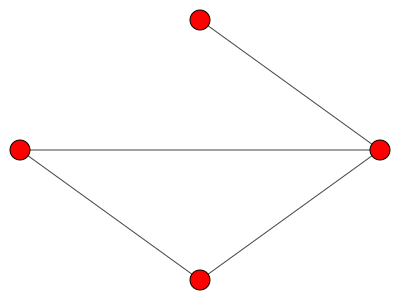

In [6]:
from igraph import Graph, plot

# Build the undirected graph
g = Graph(edges=edge_list, directed=False)
g.vs["name"] = list(range(g.vcount()))

# Graph summary and degrees
print(g.summary())
print("Degrees:", g.degree())

# Compute metrics
C = g.transitivity_avglocal_undirected()   # clustering coefficient
L = g.average_path_length()                # average path length
print("Clustering coefficient (C):", C)
print("Average shortest path length (L):", L)

# Adjacency matrix
A = g.get_adjacency_sparse()
print("Adjacency matrix shape:", A.shape)

# Optional visualization
layout = g.layout("circle")
plot(g, layout=layout, bbox=(400, 300))


## Directed Graph

In [7]:
edge_list =[(0, 1), (1, 2), (2, 1), (2, 3), (2, 5), (3, 1), (3, 4), (3, 5), (4, 5), (5, 3)]

IGRAPH DN-- 6 10 -- 
+ attr: name (v)
Out-degrees: [1, 1, 3, 3, 1, 1]
In-degrees: [0, 3, 1, 2, 1, 3]
Reciprocity: 0.4
Strongly connected components: 2
Weakly connected components: 1
Average path length (directed): 1.96


/tmp/ipython-input-1709697648.py:14: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  scc = gd.clusters(mode="STRONG")
/tmp/ipython-input-1709697648.py:15: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  wcc = gd.clusters(mode="WEAK")


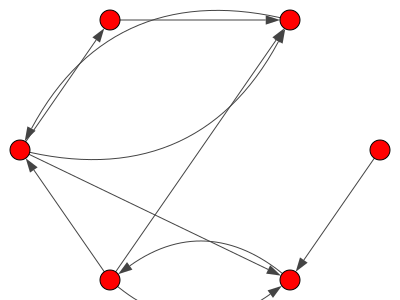

In [10]:
from igraph import Graph, plot

# Build the directed graph
gd = Graph(edges=edge_list, directed=True)
gd.vs["name"] = list(range(gd.vcount()))

# Graph summary and degrees
print(gd.summary())
print("Out-degrees:", gd.outdegree())
print("In-degrees:", gd.indegree())

# Connectivity + reciprocity
print("Reciprocity:", gd.reciprocity())
scc = gd.clusters(mode="STRONG")
wcc = gd.clusters(mode="WEAK")
print("Strongly connected components:", len(scc))
print("Weakly connected components:", len(wcc))

# Average path length
L_dir = gd.average_path_length(directed=True)

print("Average path length (directed):", L_dir)

# Optional visualization
layout = gd.layout("circle")
plot(gd, layout=layout, bbox=(400, 300))


IGRAPH DN-- 6 10 -- 
+ attr: name (v)
Out-degrees: [1, 1, 3, 3, 1, 1]
In-degrees: [0, 3, 1, 2, 1, 3]
Reciprocity: 0.4
Strongly connected components: 2
Weakly connected components: 1
Average path length (directed): 1.96


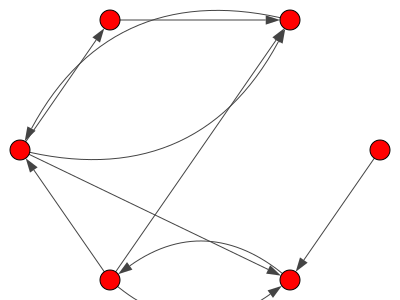

In [11]:
from igraph import Graph, plot

# Build directed graph
gd = Graph(edges=edge_list, directed=True)
gd.vs["name"] = list(range(gd.vcount()))

# Summary and degrees
print(gd.summary())
print("Out-degrees:", gd.outdegree())
print("In-degrees:", gd.indegree())

# Reciprocity
print("Reciprocity:", gd.reciprocity())

# Strongly and weakly connected components (new method)
scc = gd.connected_components(mode="STRONG")
wcc = gd.connected_components(mode="WEAK")
print("Strongly connected components:", len(scc))
print("Weakly connected components:", len(wcc))

# Average path length
L_dir = gd.average_path_length(directed=True)
print("Average path length (directed):", L_dir)

# Plot
layout = gd.layout("circle")
plot(gd, layout=layout, bbox=(400, 300))


Completed m02 Small-world assignment (Undirected & Directed Graphs)
